In [1]:
import pandas as pd
import requests
import json
import matplotlib

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/LATimesCrosswordDataCSV.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186017 entries, 0 to 186016
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   answer        185987 non-null  object
 1   author        186017 non-null  object
 2   co-author     30388 non-null   object
 3   co-co-author  146 non-null     object
 4   editor        186017 non-null  object
 5   date          186017 non-null  object
 6   url           186017 non-null  object
dtypes: object(7)
memory usage: 9.9+ MB


In [4]:
answers = df['answer']
answers.to_csv('crosswordAnswers.csv')

In [5]:
# Doing a quick Pandas count to determine most common words

df['answer'].value_counts()

,count
answer,
ERA,204
AREA,151
ORE,147
ATE,134
ALOE,133
...,...
BESTCASE,1
VETOER,1
SPOTPASS,1


In [6]:
# Determining most common crossword puzzle author in dataset

df['author'].value_counts()

,count
author,
Gary Larson,7097
Jeffrey Wechsler,5878
Paul Coulter,5636
Ed Sessa,5311
Pam Amick Klawitter,3687
...,...
Kunal Nabar,68
Guilherme Gilioli,68
John Hawksley,66


In [7]:
# Determining most common co-author in Pandas

df['co-author'].value_counts()

,count
co-author,
Katie Hale,2538
Amy Ensz,1786
Jeff Chen,1681
Doug Peterson,1578
C.C. Burnikel,1530
...,...
Pravan Chakravarthy,68
Greg Warrington,68
Larry Snyder,68


In [10]:
# Creating a dataframe for the most common author and determining that author's most used answers

larson = df['author'] == 'Gary Larson'
df[larson]['answer'].value_counts()

,count
answer,
ORE,13
ERA,12
SEE,9
ALI,9
IRE,8
...,...
EXTENDS,1
RENEWED,1
ARTROOM,1


In [21]:
# Determining and graphing the count of answers by length

df.answer.str.len().value_counts()

,count
answer,
4.0,56580
5.0,40894
3.0,38931
6.0,19949
7.0,10593
8.0,5095
9.0,3892
10.0,3585
11.0,2120


<ipython-input-22-b4f5098e4503>:1: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  df.answer.str.len().value_counts()[:12].plot(kind = 'bar')


<Axes: xlabel='answer'>

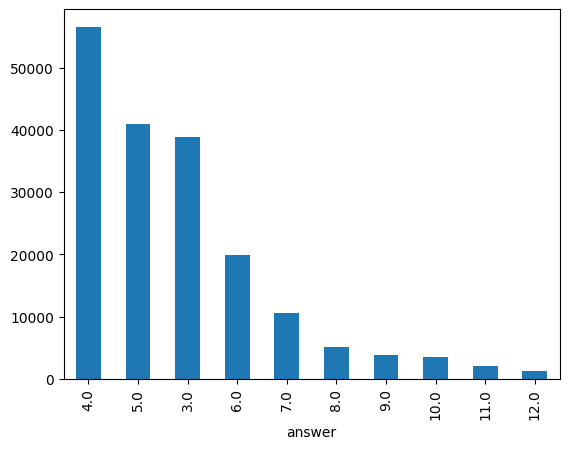

In [22]:
df.answer.str.len().value_counts()[:12].plot(kind = 'bar')

In [23]:
# Creating some dataframes for answers of a certain length to analyze in Voyant

ThreeCount = []
FourCount = []
FiveCount = []
SixCount = []
SevenCount = []


df['answer'] = df['answer'].astype(str)

for item in df.answer:
  if len(item) == 5:
    FiveCount.append(item)

  if len(item) == 4:
    FourCount.append(item)

  if len(item) == 6:
    SixCount.append(item)

  if len(item) == 3:
    ThreeCount.append(item)

  if len(item) == 7:
    SevenCount.append(item)







In [24]:
Five_df = pd.DataFrame(
    {'FiveLetters': FiveCount,}
)

Four_df = pd.DataFrame(
    {'FourLetters': FourCount,}
)

Six_df = pd.DataFrame(
    {'SixLetters': SixCount,}
)

Three_df = pd.DataFrame(
    {'ThreeLetters': ThreeCount,}
)

Seven_df = pd.DataFrame(
    {'SevenLetters' : SevenCount,}
)


<Axes: xlabel='FiveLetters'>

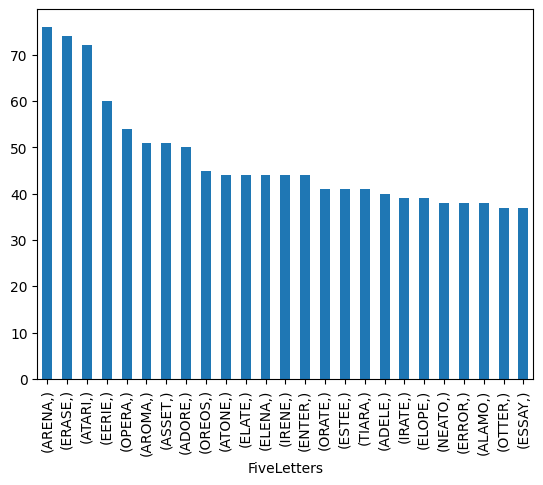

In [26]:
Five_df.value_counts()[:25].plot(kind = 'bar')

In [27]:
Five_df.to_csv('FiveLetterWords')
Four_df.to_csv('FourLetterWords')
Six_df.to_csv('SixLetterWords')
Seven_df.to_csv('SevenLetterWords')

In [28]:
Four_df.value_counts()

,count
FourLetters,
AREA,151
ALOE,133
ANTE,115
ERIE,112
OREO,112
...,...
ZEKE,1
ZEIT,1
ZEDS,1


In [29]:
Five_df.value_counts()

,count
FiveLetters,
ARENA,76
ERASE,74
ATARI,72
EERIE,60
OPERA,54
...,...
ZOOEY,1
ZONKS,1
AANDM,1


In [30]:
Six_df.value_counts()

,count
SixLetters,
ORELSE,24
ARENAS,22
ESTATE,22
OTTAWA,21
OMELET,21
...,...
ZIGZAG,1
ZESTER,1
ZEROIN,1


In [31]:
Three_df.value_counts()

,count
ThreeLetters,
ERA,204
ORE,147
ATE,134
ALE,132
ONE,130
...,...
XLS,1
XVI,1
ACI,1
